<a href="https://colab.research.google.com/github/Piyaphum/Machine-Learning-Exercise/blob/main/LogisticRegression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ทดสอบอ่านข้อมูลจากไฟล์ census.csv แล้วให้ทำนายสถานะรายได้น้อยกว่า 50000 หรือ 50000 USD (-50000/50000)



In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data_file = "skin_nonskin.csv"
df = pd.read_csv(data_file)
#print(df.isna().sum()) # check missing values in each columns
df

,att1,att2,att3,Class
0,74,85,123,skin
1,73,84,122,skin
2,72,83,121,skin
3,70,81,119,skin
4,70,81,119,skin
...,...,...,...,...
245052,162,161,111,non-skin
245053,162,161,111,non-skin
245054,162,161,111,non-skin
245055,162,161,110,non-skin


# เพิ่มข้อมูลสูญหาย (Missing value) ด้วยค่าฐานนิยม

In [3]:
encode = preprocessing.LabelEncoder()
df = df.apply(LabelEncoder().fit_transform) # encode categorical columns with label encoder
m_scaler = MinMaxScaler()
for col in ['att1','att2','att3'] : # normalize data
  df[[col]] = m_scaler.fit_transform(df[[col]])

Class
0    194198
1     50859
Name: count, dtype: int64


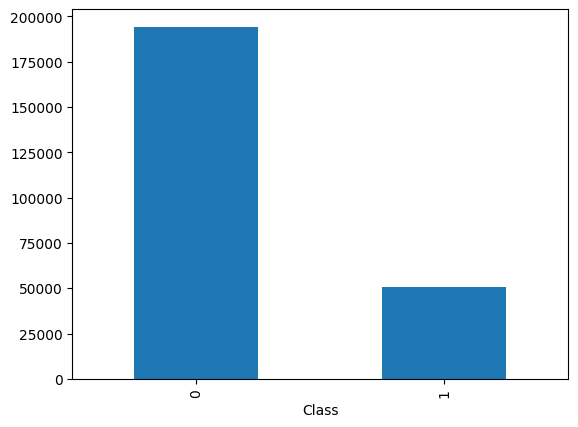

In [5]:
#print(df.isna().sum()) # check missing values again
X= df.iloc[:,:-1].values # X is list of feature columns
y = df.iloc[:,-1].values # y is label column
X

fig, ax = plt.subplots()
df = df.loc[df['Class'].isin([0,1])]
df['Class'].value_counts().plot(ax=ax, kind='bar')
print(df['Class'].value_counts())

# Logistic Regression

Here’s a step-by-step implementation in Python. This involves calculating probabilities using the logistic (sigmoid) function and updating weights using gradient descent.

Key Steps:

Dataset:

1.   **Data Splitting:**
  Split the dataset into training and testing sets.

2.   **Bias Term:**
  A column of ones is added to X to account for the intercept.

3. **Sigmoid Function:**
  Converts linear output into probabilities.

4. **Cost Function:**
  Calculates the cross-entropy loss.

5. **Gradient Descent:**
  Iteratively updates weights to minimize the cost function.

6. **Prediction:**
  Converts probabilities into binary predictions using a threshold (0.5).

In [16]:
from sklearn.model_selection import train_test_split
# Add a bias term (intercept) to the dataset
X = np.hstack((np.ones((X.shape[0], 1)), X)) # Add a column of ones
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize model parameters
weights = np.zeros(X_train.shape[1]) # 4 weights (including bias)

# Define sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
# Define the logistic regression cost function
def compute_cost(X, y, weights):
  m = len(y)
  z = np.dot(X, weights)
  predictions = sigmoid(z)
  cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
  return cost

# Define the gradient descent function
def gradient_descent(X, y, weights, learning_rate, num_iterations):
  m = len(y)
  for i in range(num_iterations):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
  # Compute gradients
  gradient = (1/m) * np.dot(X.T, (predictions - y))
  # Update weights
  weights -= learning_rate * gradient
  # Optionally print the cost every 100 iterations
  if i % 100 == 0:
    cost = compute_cost(X, y, weights)
    print(f"Iteration {i}: Cost {cost}")
  return weights

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000
# Train the model using gradient descent
final_weights = gradient_descent(X_train, y_train, weights, learning_rate, num_iterations)
# Make predictions
def predict(X, weights):
  z = np.dot(X, weights)
  probabilities = sigmoid(z)
  return (probabilities >= 0.5).astype(int)

y_pred = predict(X_test, final_weights)
# Evaluate the model
accuracy = np.mean(y_pred == y_test)

print("\nFinal Weights:", final_weights)
print("Accuracy:", accuracy)


Final Weights: [-0.02923912 -0.02923912 -0.02923912 -0.02923912 -0.02923912 -0.02923912
 -0.02923912 -0.02923912 -0.01523457 -0.01403992 -0.00753551]
Accuracy: 0.792622214967763


# Logistic Regression

1. Data Splitting:
We split the dataset into training and testing sets using train_test_split.

2. Model Training:
We use LogisticRegression from scikit-learn to fit the model to the training data.

3. Prediction and Evaluation:
Predictions are made using model.predict().
Accuracy, confusion matrix, and classification report evaluate the model’s performance.

4. Inspect Coefficients:
The model coefficients and intercept provide insights into feature importance.

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
# Optional: Inspect model coefficients
print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Accuracy: 0.9200331891509562

Confusion Matrix:
 [[55024  3248]
 [ 2631 12615]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     58272
           1       0.80      0.83      0.81     15246

    accuracy                           0.92     73518
   macro avg       0.87      0.89      0.88     73518
weighted avg       0.92      0.92      0.92     73518


Model Coefficients: [[-0.50992554 -0.50992554 -0.50992554 -0.50992554 -0.50992554 -0.50992554
  -0.50992554 -0.50992554 -7.22348639  2.87812654  8.63055614]]
Intercept: [-0.51773221]
